In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
data = pd.read_csv("winequality-white.csv", delimiter=";")
display(data.head(n=5))
print('The shape of our data is:', data.shape)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


The shape of our data is: (4898, 12)


In [4]:
labels = np.array(data['quality'])
data_without_quality= data.drop('quality', axis = 1)
feature_list = list(data_without_quality.columns)
train_features, test_features, train_labels, test_labels = train_test_split(data_without_quality, labels, test_size = 0.25, random_state = 4)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(n_estimators = 200)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)
errors = mean_squared_error(test_labels, predictions)
print('Mean Squared Error:', round(errors, 4))

Mean Squared Error: 0.3827


In [6]:
from sklearn.ensemble import GradientBoostingRegressor
rf = GradientBoostingRegressor(random_state=0)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)
errors = mean_squared_error(test_labels, predictions)
print('Mean Squared Error:', round(errors, 4))
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Mean Squared Error: 0.4829
Variable: alcohol              Importance: 0.38
Variable: volatile acidity     Importance: 0.17
Variable: free sulfur dioxide  Importance: 0.13
Variable: residual sugar       Importance: 0.05
Variable: fixed acidity        Importance: 0.04
Variable: citric acid          Importance: 0.04
Variable: chlorides            Importance: 0.04
Variable: total sulfur dioxide Importance: 0.04
Variable: pH                   Importance: 0.04
Variable: density              Importance: 0.03
Variable: sulphates            Importance: 0.02


In [7]:
from sklearn.svm import SVR
rf = SVR(kernel='linear')
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)
errors = mean_squared_error(test_labels, predictions)
print('Mean Squared Error:', round(errors, 4))

Mean Squared Error: 0.5781


In [8]:
rf.coef_

array([[-2.45498115e-02, -1.93591490e+00, -3.37719710e-02,
         2.18746282e-02, -1.09327757e+00,  5.77914104e-03,
        -1.38922147e-03, -1.96628227e-01,  4.00283074e-01,
         5.16404914e-01,  3.57095543e-01]])

In [39]:
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_score
cluster_range = range( 2, 15 )
cluster_errors = []
score1 = []
data_scaled = data_without_quality.apply(zscore)
for num_clusters in cluster_range:
  clusters = KMeans( n_clusters=num_clusters)
  labels = clusters.fit_predict(data_scaled)
  score1.append(silhouette_score(data_scaled, labels))
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:13]

,num_clusters,cluster_errors
0,2,42548.696576
1,3,39063.293864
2,4,35986.897359
3,5,33699.185476
4,6,31976.665421
5,7,30553.509025
6,8,29385.822737
7,9,28198.633957
8,10,27446.221694
9,11,26745.409292


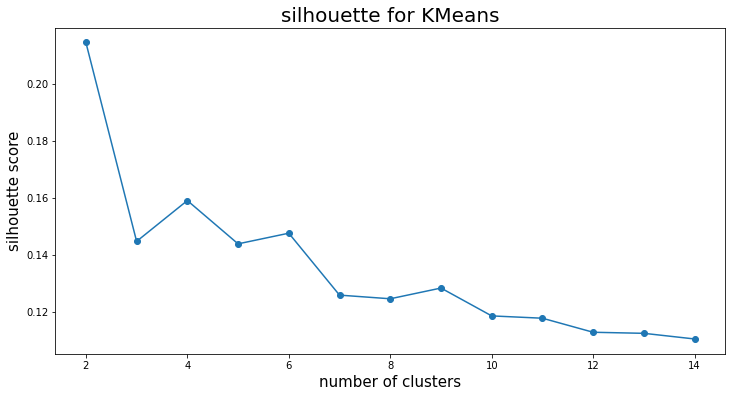

In [40]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('silhouette score', fontsize=15)
ax1.set_xlabel('number of clusters', fontsize=15)
ax1.set_title('silhouette for KMeans', fontsize=20)
plt.plot( clusters_df.num_clusters, score1, marker = "o" )

In [56]:
km = KMeans(n_clusters=4)
mean = []
MSE_arr = []
cluster_data = []
arr = []
cluster_map = pd.DataFrame()
predict = km.fit_predict(data_scaled)
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = pd.Series(predict, index=cluster_map['data_index'])
for i in range(4):
  mean.append(data.iloc[cluster_map[cluster_map.cluster == i]['data_index']]["quality"].mean())
  print("cluster " + str(i+1) + " mean: " + str(round(mean[i], 4)))
mean
for i in data.index:
  MSE_arr.append(pow(mean[cluster_map.iloc[i]['cluster']]-data.iloc[i]['quality'], 2))
mse = sum(MSE_arr) / len(MSE_arr)
print(mse)

cluster 1 mean: 6.1444
cluster 2 mean: 5.9141
cluster 3 mean: 5.6158
cluster 4 mean: 5.486
0.7330463057324189


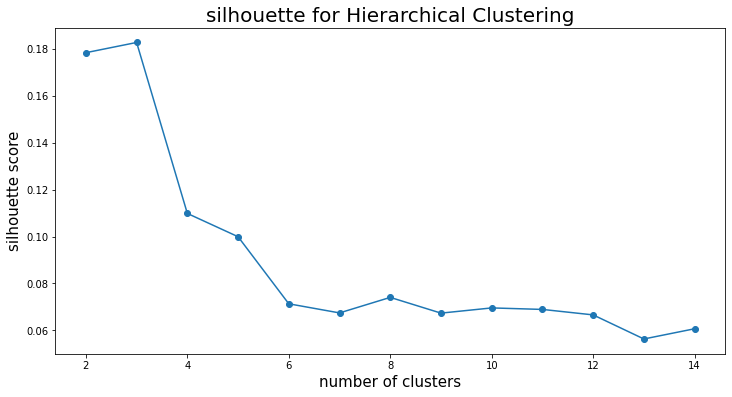

In [9]:
from sklearn.cluster import AgglomerativeClustering
cluster_range = range( 2, 15)
cluster_errors = []
score1 = []
data_scaled = data_without_quality.apply(zscore)
for num_clusters in cluster_range:
  clusters = AgglomerativeClustering( n_clusters=num_clusters)
  labels = clusters.fit_predict(data_scaled)
  score1.append(silhouette_score(data_scaled, labels))
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('silhouette score', fontsize=15)
ax1.set_xlabel('number of clusters', fontsize=15)
ax1.set_title('silhouette for Hierarchical Clustering', fontsize=20)
plt.plot( clusters_df.num_clusters, score1, marker = "o" )

In [52]:
km = AgglomerativeClustering(n_clusters=3)
mean = []
cluster_data = []
arr = []
cluster_map = pd.DataFrame()
predict = km.fit_predict(data_scaled)
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = pd.Series(predict, index=cluster_map['data_index'])
for i in range(3):
  mean.append(data.iloc[cluster_map[cluster_map.cluster == i]['data_index']]["quality"].mean())
  print("cluster " + str(i+1) + " mean: " + str(round(mean[i], 4)))
for i in data.index:
  MSE_arr.append(pow(mean[cluster_map.iloc[i]['cluster']]-data.iloc[i]['quality'], 2))
mse = sum(MSE_arr) / len(MSE_arr)
print(mse)

cluster 1 mean: 5.9881
cluster 2 mean: 5.7252
cluster 3 mean: 5.4375
0.748640531495357


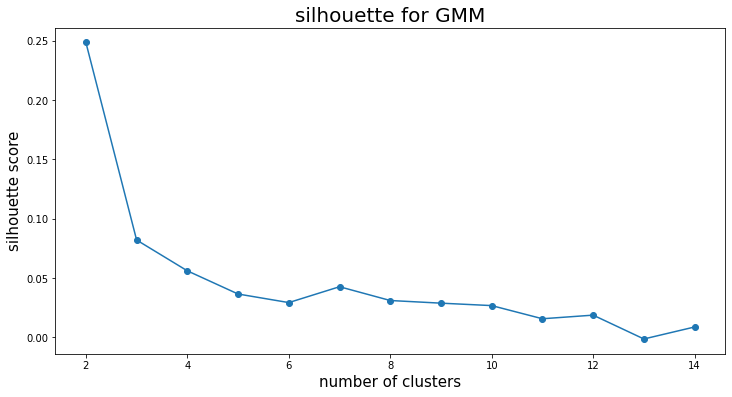

In [11]:
from sklearn.mixture import GaussianMixture
cluster_range = range( 2, 15 )
cluster_errors = []
score1 = []
for num_clusters in cluster_range:
  clusters = GaussianMixture(n_components=num_clusters)
  labels = clusters.fit_predict(data_scaled)
  score1.append(silhouette_score(data_scaled, labels))
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('silhouette score', fontsize=15)
ax1.set_xlabel('number of clusters', fontsize=15)
ax1.set_title('silhouette for GMM', fontsize= 20)
plt.plot( clusters_df.num_clusters, score1, marker = "o" )

In [53]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(data_scaled)
mean = []
cluster_data = []
arr = []
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = gmm.predict(data_scaled)
for i in range(3):
  mean.append(data.iloc[cluster_map[cluster_map.cluster == i]['data_index']]["quality"].mean())
  print("cluster " + str(i+1) + " mean: " + str(round(mean[i], 4)))
mean
for i in data.index:
  MSE_arr.append(pow(mean[cluster_map.iloc[i]['cluster']]-data.iloc[i]['quality'], 2))
mse = sum(MSE_arr) / len(MSE_arr)
print(mse)

cluster 1 mean: 6.1106
cluster 2 mean: 5.6204
cluster 3 mean: 5.3104
0.7333998901389844


,0,1,2,quality
0,1.000000e+00,-1.974961e-16,-6.660440e-17,-0.296947
1,-1.974961e-16,1.000000e+00,5.963661e-16,0.058116
2,-6.660440e-17,5.963661e-16,1.000000e+00,0.218264
quality,-2.969475e-01,5.811577e-02,2.182638e-01,1.000000


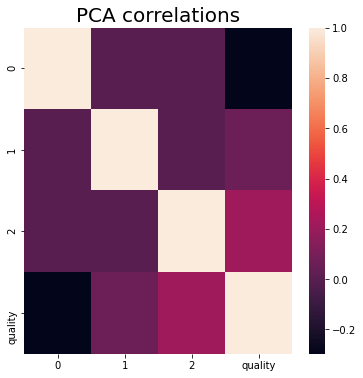

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data = principalComponents)
principalDf['quality'] = data['quality']
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_title("PCA correlations", fontsize = 20)
sns.heatmap(principalDf.corr())
principalDf.corr()

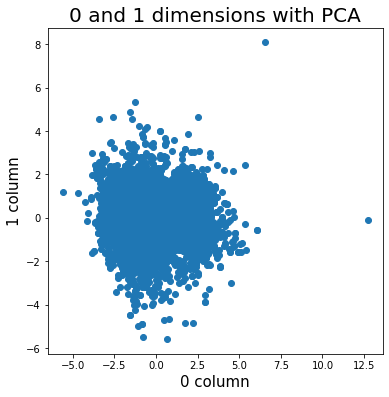

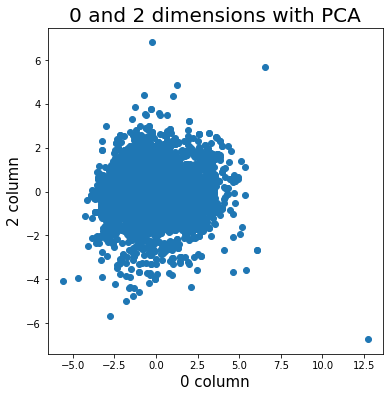

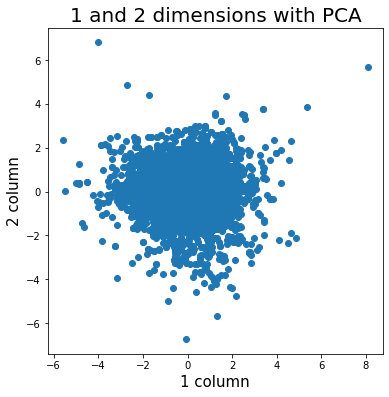

In [14]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('1 column', fontsize=15)
ax1.set_xlabel('0 column', fontsize=15)
ax1.set_title('0 and 1 dimensions with PCA', fontsize=20)
plt.scatter(principalDf[0], principalDf[1])
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('2 column', fontsize=15)
ax1.set_xlabel('0 column', fontsize=15)
ax1.set_title('0 and 2 dimensions with PCA', fontsize=20)
plt.scatter(principalDf[0], principalDf[2])
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('2 column', fontsize=15)
ax1.set_xlabel('1 column', fontsize=15)
ax1.set_title('1 and 2 dimensions with PCA', fontsize=20)
plt.scatter(principalDf[1], principalDf[2])

,0,1,2,quality
0,1.000000e+00,7.162511e-17,1.817817e-16,0.047264
1,7.162511e-17,1.000000e+00,2.193815e-18,-0.309855
2,1.817817e-16,2.193815e-18,1.000000e+00,0.202361
quality,4.726402e-02,-3.098555e-01,2.023611e-01,1.000000


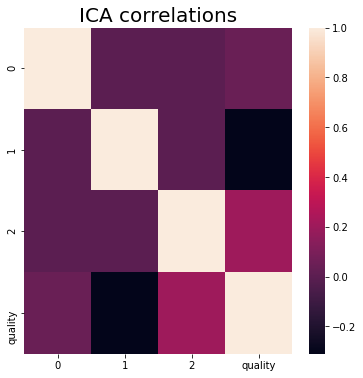

In [25]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=3)
principalComponents = ica.fit_transform(data_scaled)
principalDf = pd.DataFrame(data = principalComponents)
principalDf['quality'] = data['quality']
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_title("ICA correlations", fontsize = 20)
sns.heatmap(principalDf.corr())
principalDf.corr()

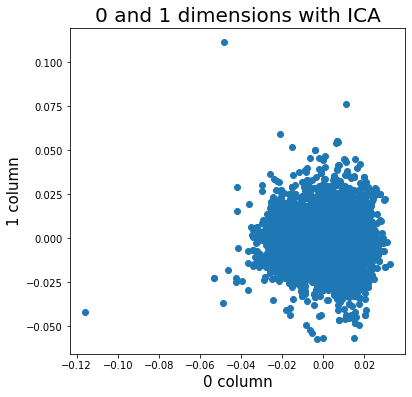

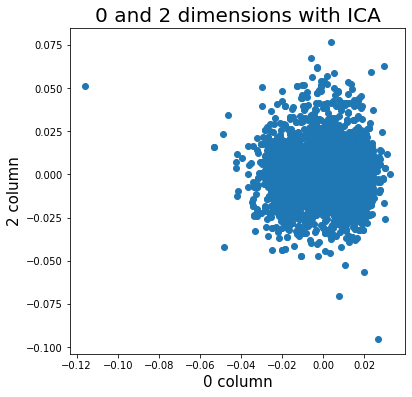

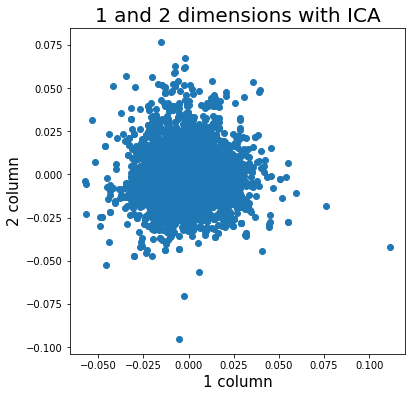

In [16]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('1 column', fontsize=15)
ax1.set_xlabel('0 column', fontsize=15)
ax1.set_title('0 and 1 dimensions with ICA', fontsize=20)
plt.scatter(principalDf[0], principalDf[1])
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('2 column', fontsize=15)
ax1.set_xlabel('0 column', fontsize=15)
ax1.set_title('0 and 2 dimensions with ICA', fontsize=20)
plt.scatter(principalDf[0], principalDf[2])
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('2 column', fontsize=15)
ax1.set_xlabel('1 column', fontsize=15)
ax1.set_title('1 and 2 dimensions with ICA', fontsize=20)
plt.scatter(principalDf[1], principalDf[2])

,0,1,2,quality
0,1.000000,-0.290390,0.232894,-0.244637
1,-0.290390,1.000000,-0.333450,0.313772
2,0.232894,-0.333450,1.000000,-0.181033
quality,-0.244637,0.313772,-0.181033,1.000000


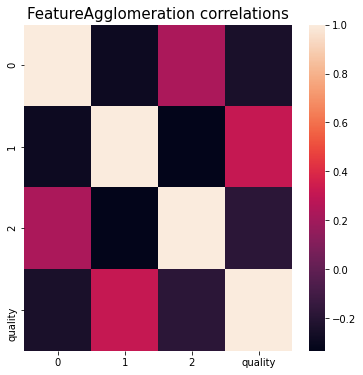

In [30]:
from sklearn.cluster import FeatureAgglomeration
agg = FeatureAgglomeration(n_clusters=3)
principalComponents = agg.fit_transform(data_scaled)
principalDf = pd.DataFrame(data = principalComponents)
principalDf['quality'] = data['quality']
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_title("FeatureAgglomeration correlations", fontsize = 15)
sns.heatmap(principalDf.corr())
principalDf.corr()

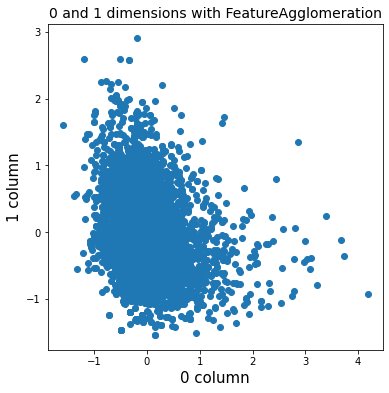

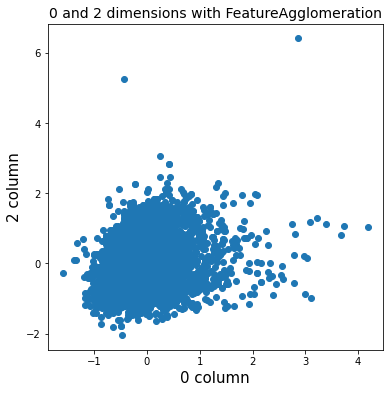

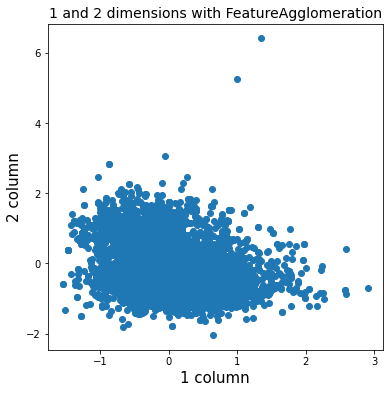

In [27]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('1 column', fontsize=15)
ax1.set_xlabel('0 column', fontsize=15)
ax1.set_title('0 and 1 dimensions with FeatureAgglomeration', fontsize=14)
plt.scatter(principalDf[0], principalDf[1])
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('2 column', fontsize=15)
ax1.set_xlabel('0 column', fontsize=15)
ax1.set_title('0 and 2 dimensions with FeatureAgglomeration', fontsize=14)
plt.scatter(principalDf[0], principalDf[2])
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('2 column', fontsize=15)
ax1.set_xlabel('1 column', fontsize=15)
ax1.set_title('1 and 2 dimensions with FeatureAgglomeration', fontsize=14)
plt.scatter(principalDf[1], principalDf[2])